In [12]:
import pandas as pd
import numpy as np
import seaborn as sns


data = pd.read_csv('/content/waze_dataset.csv')
data.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [14]:
data.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [15]:
# Isolate rows with null values
df_null = data[data['label'].isnull()]
df_null.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
77,77,NaN,63,50,133.104155,783,201,0,2649.015822,1517.209970,19,13,iPhone
80,80,NaN,116,93,436.060183,1584,283,62,4183.409514,3121.889952,18,15,iPhone
98,98,NaN,78,64,583.492789,3414,0,0,1811.140893,642.189122,12,11,Android
111,111,NaN,106,102,113.379056,2228,14,0,2817.481840,2011.724274,17,13,Android
142,142,NaN,32,26,222.129310,208,55,10,2459.816477,874.427617,11,7,iPhone
162,162,NaN,3,3,17.250220,3203,22,0,11819.366330,3351.019594,3,0,iPhone
176,176,NaN,283,226,529.533944,1110,6,0,3028.601300,2489.697005,17,11,iPhone
199,199,NaN,27,23,196.839605,2800,156,0,11579.565100,3373.482562,23,18,iPhone
266,266,NaN,70,58,137.151279,3264,45,0,1305.946778,996.394443,21,18,Android
283,283,NaN,170,137,354.297662,869,18,25,3914.401147,2500.266993,3,2,Android


In [16]:
df_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 77 to 14993
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       700 non-null    int64  
 1   label                    0 non-null      object 
 2   sessions                 700 non-null    int64  
 3   drives                   700 non-null    int64  
 4   total_sessions           700 non-null    float64
 5   n_days_after_onboarding  700 non-null    int64  
 6   total_navigations_fav1   700 non-null    int64  
 7   total_navigations_fav2   700 non-null    int64  
 8   driven_km_drives         700 non-null    float64
 9   duration_minutes_drives  700 non-null    float64
 10  activity_days            700 non-null    int64  
 11  driving_days             700 non-null    int64  
 12  device                   700 non-null    object 
dtypes: float64(3), int64(8), object(2)
memory usage: 76.6+ KB


In [17]:
# Isolate rows without null values
df_not_null = data[~data['label'].isnull()]
df_not_null.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [18]:
df_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14299 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14299 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14299 non-null  int64  
 3   drives                   14299 non-null  int64  
 4   total_sessions           14299 non-null  float64
 5   n_days_after_onboarding  14299 non-null  int64  
 6   total_navigations_fav1   14299 non-null  int64  
 7   total_navigations_fav2   14299 non-null  int64  
 8   driven_km_drives         14299 non-null  float64
 9   duration_minutes_drives  14299 non-null  float64
 10  activity_days            14299 non-null  int64  
 11  driving_days             14299 non-null  int64  
 12  device                   14299 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [19]:
# Get count of null values by device
df_null.groupby(['device'])['ID'].nunique()

device
Android    253
iPhone     447
Name: ID, dtype: int64

In [20]:
# Calculate % of iPhone nulls and Android nulls
df_null['device'].value_counts(normalize = True)

iPhone     0.638571
Android    0.361429
Name: device, dtype: float64

In [21]:
# Calculate % of iPhone users and Android users in full dataset
data['device'].value_counts(normalize = True)

iPhone     0.644843
Android    0.355157
Name: device, dtype: float64

*The propotion of iphone in null dataset is slightly lower than the propotion of iphone in full dataset.*

---


*The propotion between iphone and android in both dataset is consistent.*

In [22]:
# Calculate counts of churned vs. retained
data['label'].value_counts()

retained    11763
churned      2536
Name: label, dtype: int64

In [23]:
# Calculate % of churned vs. retained
data['label'].value_counts(normalize = True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

*Next, compare the medians of each variable for churned and retained users. The reason for calculating the median and not the mean is that we don't want outliers to unduly affect the portrayal of a typical user. For example, that the maximum value in the 'driven_km_drives' column is 21,183 km. That's more than half the circumference of the earth*

In [24]:
# Calculate median values of all columns for churned and retained users
median_table = data.groupby('label').median().reset_index()
median_table

<ipython-input-24-71cc67b43fe4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_table = data.groupby('label').median().reset_index()


,label,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
0,churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
1,retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


- *Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.*

- *The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.*

- *It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration.*

In [33]:
agg_table = data.groupby('label').agg({'driven_km_drives' : 'sum', 'drives' : 'count'}).reset_index()

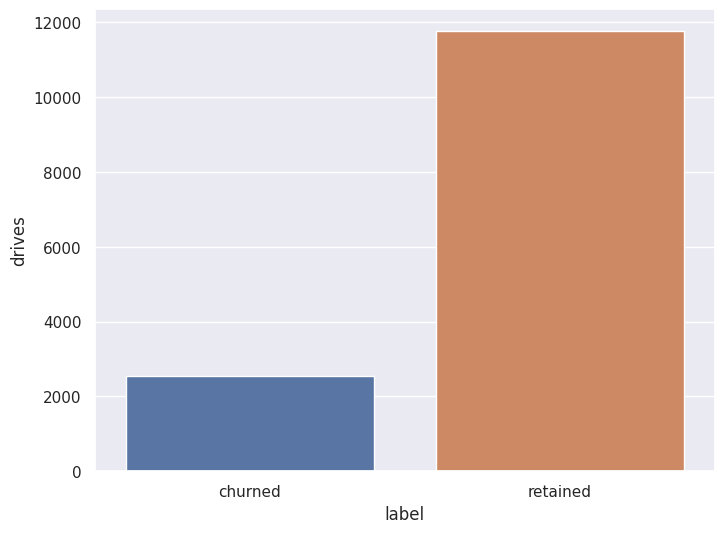

In [32]:
sns.set(rc={'figure.figsize':(8,6)})
fig1 = sns.barplot(x='label', y='drives', data=agg_table)

*Calculate the median kilometers per drive in the last month for both retained and churned users.*

In [27]:
# Divide the median distance by median number of drives
median_table['median_km_per_drive'] = median_table['driven_km_drives'] / median_table['drives']
median_table[['label','median_km_per_drive']]

,label,median_km_per_drive
0,churned,73.053113
1,retained,73.716694


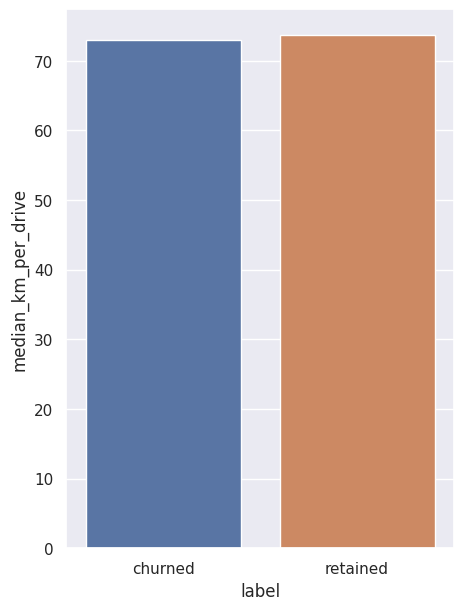

In [40]:
sns.set(rc = {'figure.figsize':(5,7)})
fig2 = sns.barplot(x='label', y = 'median_km_per_drive', data = median_table)

*Calculate the median kilometers per driving days for both retained and churned users.*

In [28]:
# Divide the median distance by median number of driving days
median_table['median_km_per_driving_days'] = median_table['driven_km_drives'] / median_table['driving_days']
median_table[['label','median_km_per_driving_days']]

,label,median_km_per_driving_days
0,churned,608.775944
1,retained,247.477472


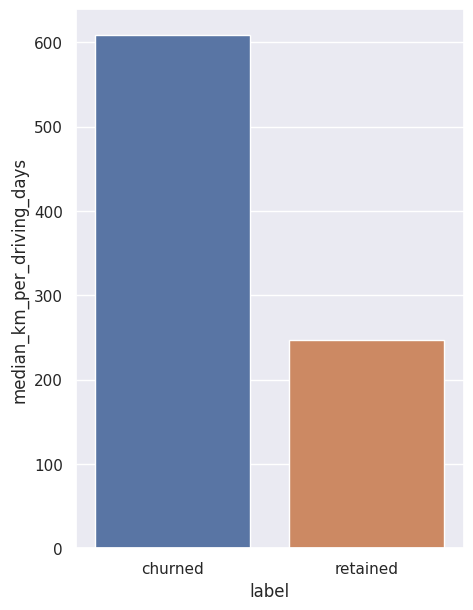

In [43]:
sns.set(rc = {'figure.figsize':(5,7)})
fig2 = sns.barplot(x='label', y = 'median_km_per_driving_days', data = median_table)

*Calculate the median number of drives per driving day for each group.*

In [29]:
# Divide the median number of drives by median number of driving days
median_table['median_drives_per_driving_days'] = median_table['drives'] / median_table['driving_days']
median_table[['label','median_drives_per_driving_days']]

,label,median_drives_per_driving_days
0,churned,8.333333
1,retained,3.357143


- *The median user who churned drove 608 kilometers each day they drove last month, which is almost 250% the per-drive-day distance of retained users. The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.*

- *It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data are serious drivers. It would probably be safe to assume that this data does not represent typical drivers at large. Perhaps the data—and in particular the sample of churned users—contains a high proportion of long-haul truckers.*

- *In consideration of how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these super-drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.*

*Examine whether there is an imbalance in how many users churned by device type.*

In [30]:
# calculate the number of Android users and iPhone users
data.groupby('label')['device'].value_counts()

label     device 
churned   iPhone     1645
          Android     891
retained  iPhone     7580
          Android    4183
Name: device, dtype: int64

In [31]:
# calculate the percentage of Android users and iPhone users
data.groupby('label')['device'].value_counts(normalize = True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: device, dtype: float64

*The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.*